# 0. Install Dependencies

In [1]:
# !pip install tensorflow
# !pip install gym
# !pip install keras
# !pip install keras-rl2

# 1. Test Random Environment with OpenAI Gym

In [2]:
#Import Dependencies
import gym 
import random

In [4]:
#Setup the environment
env = gym.make('CartPole-v1')
states = env.observation_space.shape[0]
actions = env.action_space.n

In [3]:
#Visualize the envirement and print the Reward Score
episodes = 13
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

D:\anaconda\lib\site-packages\gym\core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode:1 Score:44.0
Episode:2 Score:15.0
Episode:3 Score:12.0
Episode:4 Score:17.0
Episode:5 Score:35.0
Episode:6 Score:14.0
Episode:7 Score:15.0
Episode:8 Score:29.0
Episode:9 Score:28.0
Episode:10 Score:27.0
Episode:11 Score:17.0
Episode:12 Score:18.0
Episode:13 Score:49.0


# 2. Create a Deep Learning Model with Tensorflow Keras

In [5]:
#Import Dependencies
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

D:\anaconda\lib\site-packages\botocore\httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


In [6]:
#Build the Deep Learning Model
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [15]:
#del model  #Run this Line the Sequential Model Error Occured in Built Adent Model

In [16]:
model = build_model(states, actions)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 24)                120       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


In [18]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file="model pic.png",show_shapes=True )

# 3. Build Agent with Keras-RL

In [19]:
# •	Import Dependencies and Agents
#      o	RL DQNAgent
#      o	RL BoltzmannQPolicy 

from rl.agents import DQNAgent  #value-based reinforcement learning agent that trains a critic to estimate the return or future rewards
from rl.policy import BoltzmannQPolicy #approach involves choosing an action with weighted probabilities - Policy Based
from rl.memory import SequentialMemory # to save the DQNAgent Memory
from tensorflow.keras.callbacks import TensorBoard

In [20]:
#Build the agent using RL DQN, Policy Boltzmann and using the above DL Model
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [21]:
dqn = build_agent(model, actions) #Instantiated the Model #Run del model before DL Model if the Sequential Model Error Occured

In [22]:
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae']) #Compile the Model using Adam Optimizer and metrics Mean absolute error

In [ ]:
#tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir="./logs")
dqn.fit(env, nb_steps=20000, visualize=False, verbose=2) # Strat RL and DL Model Training

### Episode Steps

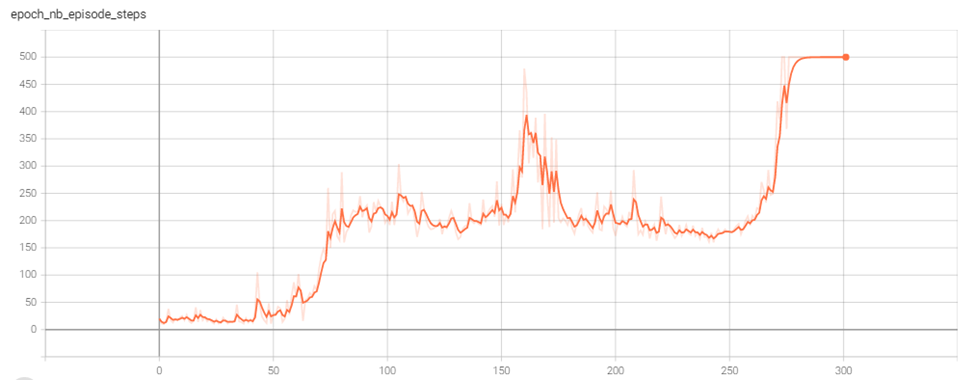

### Reward Step

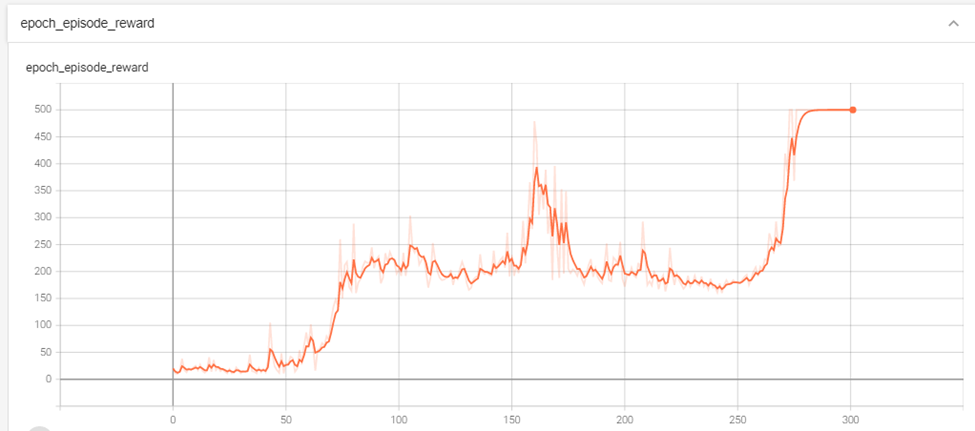

In [30]:
#Test The Model 
scores = dqn.test(env, nb_episodes=5, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 5 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500
500.0


In [31]:
_ = dqn.test(env, nb_episodes=5, visualize=True) #Visualization of Cartpole

Testing for 5 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500


# 4. Reloading Agent from Memory

In [30]:
#First Save the Model
dqn.save_weights('dqn_weights_r500_ERRORFREE.h5f', overwrite=True)

In [26]:
#Delete All the Above Model and Envirement Data
del model
del dqn
del env

In [27]:
#Reload the Envirement
env = gym.make('CartPole-v1')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

D:\anaconda\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
D:\anaconda\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
D:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [28]:
#Reload the DL-RL Model
dqn.load_weights('dqn_weights_r500_ERRORFREE.h5f')

In [40]:
_ = dqn.test(env, nb_episodes=5, visualize=True) #Visualize the model to see the results

Testing for 5 episodes ...


D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
D:\anaconda\lib\site-packages\gym\core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500


In [41]:
#DONE

### Build Agent (Deep Learning & Reinforcement Learning)

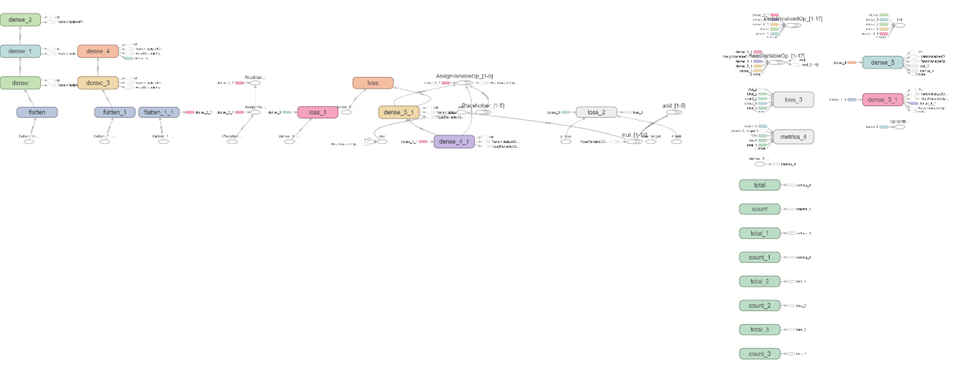